In [ ]:
# DV9: Display histograms of average pollutant concentrations per province, including global averages
#  ## DV-9 Average concentration – histogram
# The interface allow the user to choose a pollutant and a time window and 
# visualize in a histogram the average for each province (along with the global average)
# concentration of the selected pollutant over a selected time period.
# [Optional: same average but for each municipality

# - button select pollutant
# - button select start day
# - button select end day
# - button select start mounth
# - button select end mounth
# - button select start year
# - button select end year
# - button select administrative level

In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Output dinamici
output1 = widgets.Output()
output2 = widgets.Output()

# Variabili globali
start_date = None
end_date = None

# Dropdown inquinanti
dropdown_pollutant = widgets.Dropdown(
    options=[
        "Ammoniaca", "Arsenico", "Benzo(a)pirene", "Benzene", "Biossido di Azoto",
        "Biossido di Zolfo", "BlackCarbon", "Cadmio", "Monossido di Azoto",
        "Monossido di Carbonio", "Nikel", "Ossidi di Azoto", "Ozono", "PM10",
        "PM10 (SM2005)", "Particelle sospese PM2.5", "Particolato Totale Sospeso",
        "Piombo"
    ],
    description='Inquinante:'
)

# Callback dopo selezione inquinante
def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output1:
            clear_output()
            global start_date, end_date
            start_date = widgets.DatePicker(description='Inizio:')
            end_date = widgets.DatePicker(description='Fine:')

            def check_dates(_):
                if start_date.value and end_date.value:
                    with output2:
                        clear_output()
                        # Rimosso: display(dropdown_prov)

            start_date.observe(check_dates, names='value')
            end_date.observe(check_dates, names='value')

            display(widgets.VBox([start_date, end_date]))

# Collega evento
dropdown_pollutant.observe(on_dropdown_change, names='value')

# Visualizzazione
display(dropdown_pollutant)
display(output1)
display(output2)



Dropdown(description='Inquinante:', options=('Ammoniaca', 'Arsenico', 'Benzo(a)pirene', 'Benzene', 'Biossido d…

Output()

Output()

In [2]:
from datetime import date

# Assicurati che start_date.value ed end_date.value non siano None
if start_date.value and end_date.value:
    data = {
        "var_pollutant": dropdown_pollutant.value,
        "var_start_date": start_date.value.strftime('%Y-%m-%d 00:00:00'),
        "var_end_date": end_date.value.strftime('%Y-%m-%d 24:00:00'),
    }

data

{'var_pollutant': 'Ozono',
 'var_start_date': '2024-12-20 00:00:00',
 'var_end_date': '2024-12-22 24:00:00'}

In [3]:
# DV-9 

import requests
import pandas as pd
import json

t=requests.post(url="http://127.0.0.1:5000/api/DV_9", json=data) 

try:
    data = t.json() #This will convert the response to a json object
    print("The query returned", len(data), "rows")
    print(type(data))
except requests.exceptions.JSONDecodeError:
    print("Risposta non valida JSON!")
    print("Contenuto della risposta:", t.text)
    data = None

df = pd.DataFrame(data)
print(df)

The query returned 12 rows
<class 'list'>
    avg_concentration         nome_provincia
0           16.320379                   LODI
1           57.463462                  LECCO
2           27.521993                  PAVIA
3           21.339384                BRESCIA
4           29.894161  MONZA E DELLA BRIANZA
5           42.955251                SONDRIO
6           19.128767                MANTOVA
7           32.108621                 VARESE
8           34.805479                   COMO
9            8.873516                CREMONA
10          24.887671                BERGAMO
11          21.579452                 MILANO


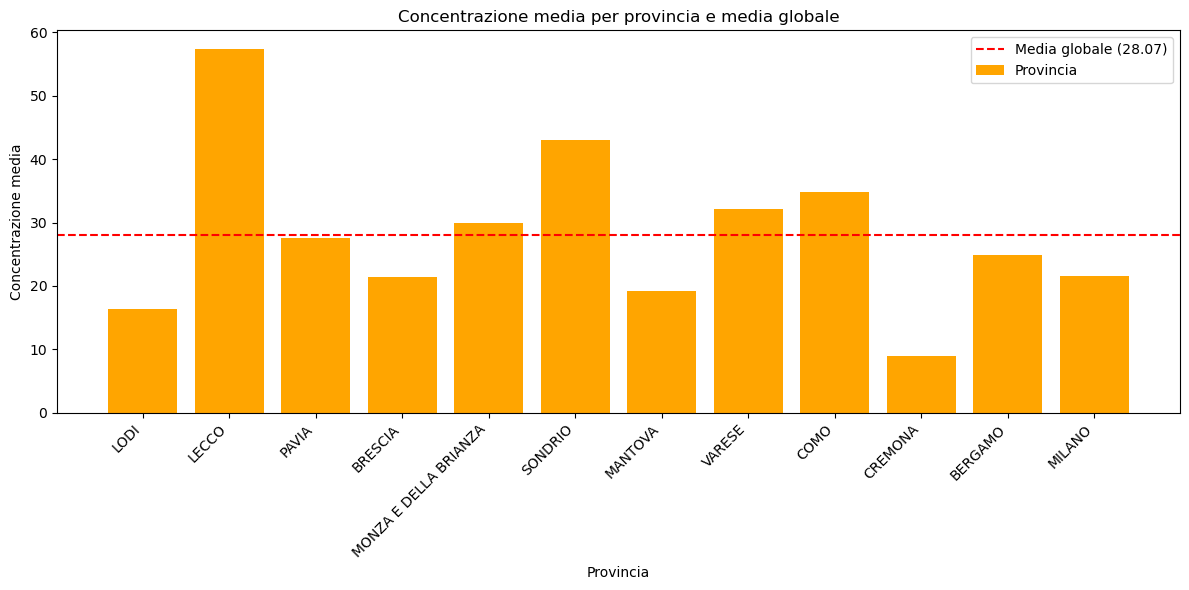

In [4]:
# visualize in a histogram the average for each province (along with the global average) concentration of the selected pollutant over a selected time period.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate global average
global_avg = df['avg_concentration'].mean()

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(df['nome_provincia'], df['avg_concentration'], label='Provincia', color='orange')
plt.axhline(global_avg, color='red', linestyle='--', label=f'Media globale ({global_avg:.2f})')
plt.xlabel('Provincia')
plt.ylabel('Concentrazione media')
plt.title('Concentrazione media per provincia e media globale')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()